# Analiza podatkov - Cene stanovanj v Sloveniji



## Projektna naloga pri predmetu Programiranje 1

Naloga obsega analizo podatkov o nepremičninah, ki so naprodaj v Sloveniji, pridobljenih iz spletne strani www.nepremicnine.net/ v mesecu novembru 2021 ter januarju 2022.

Za posamezne regije oz. območja, kot so navedena na spletni strani sem zajela naslednje podatke: 
- lokacija
- število sob
- nadstropje
- leto izgradnje
- velikost
- cena


In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
path_november = "C:/Users/Milka/Cene-stanovanj-v-Sloveniji/csv_podatki_november/"

path_januar = "C:/Users/Milka/Cene-stanovanj-v-Sloveniji/csv_podatki_januar/"

import os 
seznam_november = os.listdir(path_november)
seznam_januar = os.listdir(path_januar)

def tabele_v_seznam(seznam, path):
    seznam_tabel = []
    for i in range(len(seznam)):
        tabela = pd.read_csv(path + seznam[i])
        seznam_tabel.append(tabela)
    return seznam_tabel

Za lažje delo bom najprej vse podatke za posamezni mesec združila v novo tabelo. Vsakemu stanovanju bo dodan nov stolpec z informacijo o regiji.

In [160]:
tabele_november = tabele_v_seznam(seznam_november, path_november)
tabele_januar = tabele_v_seznam(seznam_januar, path_januar)

stolpec_regij = ["Dolenjska", "Gorenjska", "Južna Primorska", 
"Koroška", "LJ center", "LJ okolica", "Posavska", 
"Savinjska", "Severna Primorska", "Zasavska"]

podatki_november = pd.concat(tabele_november, keys=stolpec_regij)
podatki_januar = pd.concat(tabele_januar, keys=stolpec_regij)

### Čiščenje podatkov
V eni izemd tabel se je pojavil dodaten stolpec opis, ki ni koristen, zato ga izbrišem. 
Opazila sem, da se v csv datoteki ponavljajo vnosi, čeprav na spletni strani ni ponovljenih oglasov.
Pri združevanju tabel in brisanju vrstic so se pojavile težave pri indeksih.

In [240]:
pd.set_option("display.max_rows", 10, "display.max_columns", 20)

november = podatki_november.drop_duplicates().drop(columns= 'opis')
januar = podatki_januar.drop_duplicates()

november = november.reset_index().drop('level_1', 1)
januar = januar.reset_index().drop('level_1', 1)

november['regija'] = november['level_0']
januar['regija'] = januar['level_0']

november = november.drop('level_0', 1)
januar = januar.drop('level_0', 1)

#V tabeli januar se je na enem mestu 64 pojavila napačna vrednost, zato jo ročno popravim

januar['cena'][364] = '199.000,00'

C:\Users\Milka\AppData\Local\Temp\ipykernel_15308\2519313811.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  november = november.reset_index().drop('level_1', 1)
C:\Users\Milka\AppData\Local\Temp\ipykernel_15308\2519313811.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  januar = januar.reset_index().drop('level_1', 1)
C:\Users\Milka\AppData\Local\Temp\ipykernel_15308\2519313811.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  november = november.drop('level_0', 1)
C:\Users\Milka\AppData\Local\Temp\ipykernel_15308\2519313811.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  januar = januar.drop('level_0', 1)
C:\Users\Milka\AppData

Pri pridobivanju podatkov se je pojavilo nekaj napak pri stolpcu 'cena'. Podatke prečistim z naslednjo funckijo in jim spremeni tip v cela števila.
V float bo potrebno spremeniti tudi velikost stanovanja, v int pa leto gradnje.

In [366]:
def popravi_ceno(vnos):
    nov_niz = ''
    for znak in str(vnos):
        if znak != ',':
            nov_niz += znak
        else:
            break
    return int(nov_niz.replace('.',''))

def popravi_velikost(vnos):
    return float(vnos.replace(',', '.'))

def popravi_leto(vnos):
    return int(vnos)

november['cena'] = november['cena'].map(lambda x: popravi_ceno(x))
januar['cena'] = januar['cena'].map(lambda x: popravi_ceno(x))

november['velikost'] = november['velikost'].map(lambda x: popravi_velikost(x))
januar['velikost'] = januar['velikost'].map(lambda x: popravi_velikost(x))

november['leto'] = november['leto'].map(lambda x: popravi_leto(x))
januar['leto'] = januar['leto'].map(lambda x: popravi_leto(x))




Za primerjavo cen bo koristna informacija o ceni na kvadratni meter stanovanja.

In [370]:
november['cena na m2'] = round(november['cena'] / november['velikost'])
januar['cena na m2'] = round(januar['cena'] / januar['velikost'])
november

,lokacija,sobno,nadstropje,leto,velikost,cena,regija,mesto,cena na m2
0,MIRNA,3-sobno,1,2021,83.40,165132,Dolenjska,MIRNA,1980.0
1,NOVO MESTO,3-sobno,2,2023,90.68,207332,Dolenjska,NOVO MESTO,2286.0
2,NOVO MESTO,4-sobno,5,2023,104.82,273402,Dolenjska,NOVO MESTO,2608.0
3,ČRNOMELJ,2-sobno,4,1984,62.00,50000,Dolenjska,ČRNOMELJ,806.0
4,"ČRNOMELJ, CENTER",4-sobno,2,2014,150.00,90000,Dolenjska,ČRNOMELJ,600.0
...,...,...,...,...,...,...,...,...,...
1324,KRŠKO,"3,5-sobno",M,1992,88.70,59900,Zasavska,KRŠKO,675.0
1325,SENOVO,3-sobno,1,1923,98.90,80000,Zasavska,SENOVO,809.0
1326,SENOVO,"3,5-sobno",VP,1973,100.00,95000,Zasavska,SENOVO,950.0
1327,SENOVO,"3,5-sobno",1,1973,100.00,89000,Zasavska,SENOVO,890.0


In [173]:
# filter po starosti, velikosti
starost_januar = januar.sort_values(by=['leto'], ascending=True)
cena_januar = januar.sort_values(by=['velikost'], ascending=True)

Za natančnejšo analizo lokacij, moram počistiti stolpec, tako da bo v njem ostalo samo eno ime. 

In [253]:
def popravi_mesto(vnos):
    nov_niz = ''
    for znak in str(vnos):
        if znak != ',':
            nov_niz += znak
        else:
            break
    return nov_niz

november['mesto'] = november['lokacija'].map(lambda x: popravi_mesto(x))
januar['mesto'] = januar['lokacija'].map(lambda x: popravi_mesto(x))

# Analiza podatkov
Zdaj so podatki v grobem pripravljeni za analizo.
Najprej si poglejmo, koliko stanovanj je bilo na voljo po regijah in natančneje po mestih v januarju in novembru.

# Število stanovanj na trgu glede na regije

Koliko stanovanj je na voljo v posameznih regijah in razlika med meseci. 

In [341]:
stevilo_stanovanj_januar = januar[['regija', 'mesto']].copy()
stevilo_stanovanj_november = november[['regija', 'mesto']].copy()

stevilo_stanovanj_regije_januar = stevilo_stanovanj_januar.groupby(by='regija').size()
stevilo_stanovanj_regije_november = stevilo_stanovanj_november.groupby(by='regija').size()

df1 = stevilo_stanovanj_regije_januar.to_frame()
df1.index.names = [None]
df1 = df1.rename(columns={0: 'januar'})

df2 = stevilo_stanovanj_regije_november.to_frame()
df2.index.names = [None]
df2 = df2.rename(columns={0: 'november'})

df = pd.concat([df2, df1], axis=1)
df



,november,januar
Dolenjska,50,43
Gorenjska,109,120
Južna Primorska,153,154
Koroška,27,29
LJ center,620,577
LJ okolica,113,127
Posavska,22,20
Savinjska,202,164
Severna Primorska,23,24
Zasavska,10,13


<AxesSubplot:>

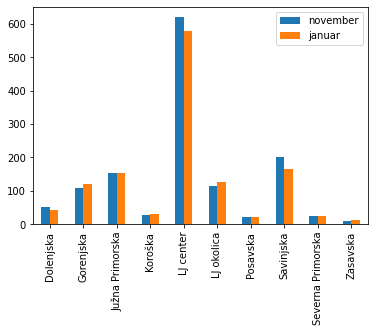

In [342]:
df.plot.bar()

# Število stanovanj v mestih

In [356]:
stevilo_po_mestih = januar.groupby('mesto').size().sort_values(ascending=False).to_frame()
stevilo_po_mestih.index.names = [None]
stevilo_po_mestih.rename(columns={0: 'število stanovanj'})

,število stanovanj
LJ. CENTER,150
LJ. BEŽIGRAD,77
LJ. ŠIŠKA,53
KRANJ,48
KOPER,40
...,...
NOTRANJE GORICE,1
MORAVSKE TOPLICE,1
MLAKA PRI KOČEVJU,1
MISLINJSKA DOBRAVA,1


<AxesSubplot:>

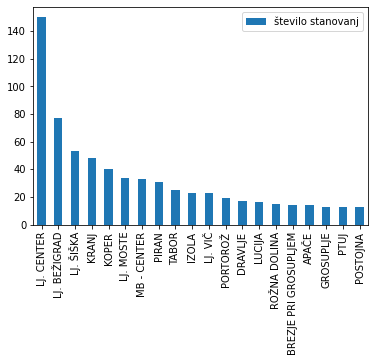

In [363]:
stevilo_po_mestih.rename(columns={0: 'število stanovanj'}).head(20).plot.bar()

Kot predvideno je največ stanovanj na voljo v Ljubljani, natančneje v centru. Najmanj jih je na voljo v Zasavski regiji.

# Povprečna cena kvadratnega metra glede na regijo

Za vsako izmed regij izračunam povprečno ceno na kvadrat.

In [390]:
cena_regije_januar = januar[['regija','cena na m2']].groupby('regija').mean().round()
cena_regije_januar.index.names = [None]
cena_regije_januar = cena_regije_januar.rename(columns={'cena na m2': 'januar'})
cena_regije_januar

cena_regije_november = november[['regija','cena na m2']].groupby('regija').mean().round()
cena_regije_november.index.names = [None]
cena_regije_november = cena_regije_november.rename(columns={'cena na m2': 'november'})

df_regije_cena = pd.concat([cena_regije_november, cena_regije_januar], axis=1)
df_regije_cena


,november,januar
Dolenjska,1470.0,1522.0
Gorenjska,2748.0,2941.0
Južna Primorska,3603.0,3768.0
Koroška,1371.0,1579.0
LJ center,3725.0,3859.0
LJ okolica,2518.0,2588.0
Posavska,1151.0,1750.0
Savinjska,1600.0,1746.0
Severna Primorska,1452.0,1437.0
Zasavska,1167.0,1261.0


<AxesSubplot:>

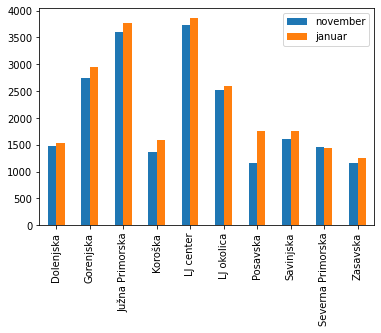

In [391]:
df_regije_cena.plot.bar()

In [432]:
# to tabelo bomo uporabljali za raziskovanje povezave med velikostjo ter ceno na kvadratni meter
skupno = pd.concat([november, januar])
skupno['ponovljeno'] = skupno.duplicated(subset=['lokacija', 'sobno','nadstropje', 'leto', 'velikost', 'regija', 'mesto'])


## Cena v odvisnosti od leta gradnje.

<AxesSubplot:xlabel='leto', ylabel='cena na m2'>

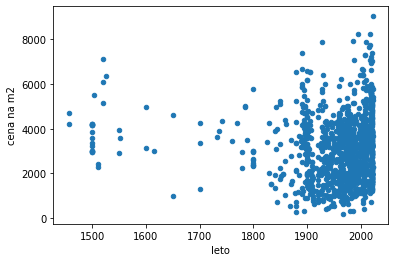

In [429]:
januar[januar.leto > 1400].plot.scatter('leto','cena na m2')

<AxesSubplot:xlabel='leto', ylabel='cena na m2'>

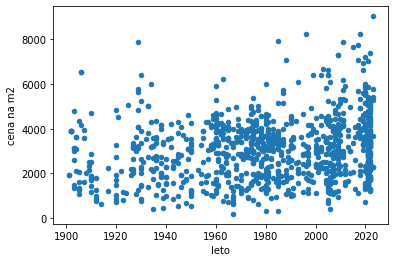

In [430]:
januar[januar.leto > 1900].plot.scatter('leto','cena na m2')

V podatkih ni razvidnega vzorca med ceno stanovanja ter letom gradnje.

## Cena v odvisnosti od velikosti stanovanj.

<AxesSubplot:xlabel='velikost', ylabel='cena'>

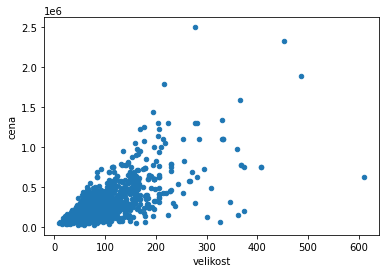

In [402]:
januar.plot.scatter('velikost','cena')

Cena se pričakovano sorazmerno zvišuje s velikostjo.

## Povezava med starostjo stanovanj ter regijami

Izračunam povprečno starost nepremičnin za posamezno regijo.

In [439]:
povprecna_starost = januar[['regija','leto']]
povprecna_starost.groupby('regija').mean().round()

,leto
regija,
Dolenjska,1974.0
Gorenjska,1962.0
Južna Primorska,1956.0
Koroška,2002.0
LJ center,1940.0
LJ okolica,1987.0
Posavska,1980.0
Savinjska,1965.0
Severna Primorska,2001.0


## Stanovanja, ki so na trgu dlje časa
Za podatke iz novembra in januarja poiščem ponavljajoče se oglase in jih shranim v novo tabelo. V čem stanovanja, ki so na trgu dlje časa (vsaj 3 mesece), odstopajo od drugih?

In [426]:
povprecje_ponovitve = skupno[skupno.ponovljeno == True].drop_duplicates().drop(columns='ponovljeno').mean().round().to_frame().rename(columns={0: 'ponovitve povprečje'})
povprecje_januar = januar.mean().round().to_frame().rename(columns={0: 'januar povprečje'})
povprecje_november = november.mean().round().to_frame().rename(columns={0: 'november povprečje'})
df_regije_cena = pd.concat([povprecje_november, povprecje_januar, povprecje_ponovitve], axis=1)
df_regije_cena

C:\Users\Milka\AppData\Local\Temp\ipykernel_15308\4069147258.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  povprecje_ponovitve = skupno[skupno.ponovljeno == True].drop_duplicates().drop(columns='ponovljeno').mean().round().to_frame().rename(columns={0: 'ponovitve povprečje'})
C:\Users\Milka\AppData\Local\Temp\ipykernel_15308\4069147258.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  povprecje_januar = januar.mean().round().to_frame().rename(columns={0: 'januar povprečje'})
C:\Users\Milka\AppData\Local\Temp\ipykernel_15308\4069147258.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is depreca

,november povprečje,januar povprečje,ponovitve povprečje
leto,1961.0,1957.0,1947.0
velikost,99.0,99.0,112.0
cena,286965.0,299025.0,341923.0
cena na m2,2971.0,3125.0,3105.0


Stanovanja, ki se prodajajo dlje časa so v povprečju starejša ter večja od tistih, ki so se prodale v manj kot 3-h mesecih. Ali je to zaradi cen težko ocenim, saj so se cene v tem obdobju zvišale. 

## Zaključek:

Ugotovila sem:
- Stanovanj je največ v Ljubljani in najmanj v Zasavski, Posavski, Koroški ter Severno Primorski regiji. To drži tako za mesec november kot januar
- Primerjava med meseci in po regijah je pokazala, da so se nepremičnine podražile v vseh regijah.
- Očitno so večja stanovanja tudi dražja, medtem ko jasne povezave med letom gradnje in ceno ni bilo. To gre najbrž pripisati dejstvu, da so moji podatki obsegali le leto gradnje, ne pa tudi leto obnove.
- Ali se dražja stanovanja prodajajo dlje nisem mogla sklepati. Stanovanja, ki se prodajajo dlje časa so v povprečju starejša in večja. 

Žal sem podatke zajela le za dva meseca, zanimiva bi bila podobna analiza za vse mesece v letu, morda tudi primerjava z drugimi državami. 